In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 100
n2 = 5
eta = 0.3 #learning rate
Niter = 8000
Nepoch = 6000

In [3]:
# ETAPE 2

# génération des données d'apprentissage

X = np.linspace(0,1,n).reshape(1,n)
y = np.sin(2*np.pi*X)

In [4]:
np.shape(X)
np.shape(y)

(1, 100)

In [5]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [6]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(1,n2)
b3 = np.random.randn(1)


In [7]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def compute_grad(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = z3

    #C = np.mean((a3 - y)**2)*0.5
    # Calcul
    delta3 = (a3-y)
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    #dCdW2 = dCdW2.T
    dCdW3 = np.dot(delta3,a2.T)
    #dCdW3 = dCdW2.T
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [8]:
# Test de la fonction compute_grad:
# Pour tester, on prendra les matrices suivantes:

W2 = np.array([[0.1],[0.2],[0.7],[0.9],[0.1]])
b2 = np.array([[0.4],[0.5],[0.3],[0.8],[0.2]])

W3 = np.array([[0.4, 0.6, 0.8, 0.7, 0.2]])
b3 = np.array([[2.5]])

xi = np.array([[0.3]])
yi = np.sin(2*np.pi*xi)

dCdW2, dCdW3, dCdb2, dCdb3 = compute_grad(xi,yi,W2,W3,b2,b3)

# Vous devez trouver les résultats suivants:
print('dCdW2=')
print(dCdW2)
print('')
print('dCdW3=')
print(dCdW3)
print('')
print('dCdb2=')
print(dCdb2)
print('')
print('dCdb3=')
print(dCdb3)

dCdW2=
[[0.09472382]
 [0.13767658]
 [0.18598269]
 [0.13201616]
 [0.04893513]]

dCdW3=
[[2.00282269 2.10390657 2.06540843 2.46139695 1.84208145]]

dCdb2=
[[0.31574606]
 [0.45892193]
 [0.6199423 ]
 [0.44005386]
 [0.1631171 ]]

dCdb3=
[[3.30567707]]


In [9]:
# ETAPE 6

# Définition de la fonction coût

def cost(y,y_pred):
    return (1/2*n)* np.linalg.norm(y-y_pred)

In [10]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = z3
    
    return a3

In [11]:
# Test de la fonction model_predict

print(model_predict(xi,W2,W3,b2,b3))

[[4.25673358]]


In [12]:
Nepoch = 3000
Nbatch = 5
Batchsize = 20

# Méthode de gradient stochastique avec Mini Lots et moyenne glissant
# ~Méthode de gradient stochastique avec Momentum

In [13]:
# ETAPE 8

# Programme principal : phase d'apprentissage

Cost = np.zeros(Nepoch)

beta = 0.9


dCdW2_avg = np.zeros(W2.shape)
dCdW3_avg = np.zeros(W3.shape)
dCdb2_avg = np.zeros(b2.shape)
dCdb3_avg = np.zeros(b3.shape)
for k in range(Nepoch):
    
    # Votre code ici
    
    # Mélanger des données
    oscuro
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)
    
    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize

            xi = X[0][u+i]
            yi = y[0][u+i]
            
            gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
            
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3
            
            dCdW2_avg = beta*dCdW2_avg + (1-beta)*dCdW2
            dCdW3_avg = beta*dCdW3_avg + (1-beta)*dCdW3
            dCdb2_avg = beta*dCdb2_avg + (1-beta)*dCdb2
            dCdb3_avg = beta*dCdb3_avg + (1-beta)*dCdb3
        
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*dCdW2_avg
        W3 = W3 - (eta/Batchsize)*dCdW3_avg
        b2 = b2 - (eta/Batchsize)*dCdb2_avg
        b3 = b3 - (eta/Batchsize)*dCdb3_avg

In [14]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.12682017,  0.16925921,  0.21155342,  0.25365586,  0.29551542,
         0.33707644,  0.37827829,  0.41905503,  0.45933487,  0.49903977,
         0.53808493,  0.57637826,  0.61381991,  0.65030173,  0.68570677,
         0.71990876,  0.75277171,  0.78414948,  0.81388547,  0.8418124 ,
         0.86775226,  0.89151641,  0.91290593,  0.93171222,  0.94771792,
         0.96069828,  0.97042288,  0.97665791,  0.97916901,  0.9777247 ,
         0.97210044,  0.96208333,  0.94747749,  0.92810997,  0.90383719,
         0.8745517 ,  0.84018911,  0.80073496,  0.75623115,  0.70678169,
         0.65255734,  0.59379876,  0.53081795,  0.46399745,  0.39378731,
         0.3206996 ,  0.2453006 ,  0.16820065,  0.0900423 ,  0.0114869 ,
        -0.06679953, -0.1441607 , -0.21996402, -0.29361342, -0.3645607 ,
        -0.4323148 , -0.49644879, -0.55660445, -0.61249446, -0.6639023 ,
        -0.71068025, -0.75274554, -0.79007532, -0.82270058, -0.85069955,
        -0.87419078, -0.89332623, -0.90828462, -0.9

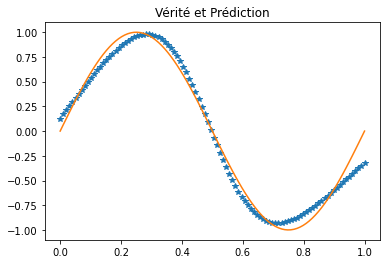

In [15]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0],'+', label="Verité" )
plt.title('Vérité et Prédiction')
plt.show()

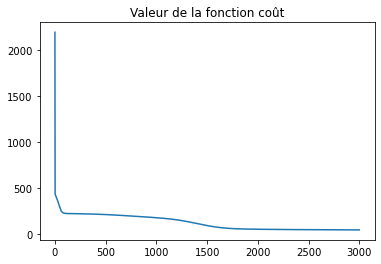

In [16]:
plt.figure()
plt.plot(Cost)
plt.title('Valeur de la fonction coût')
plt.show()